# Derivation of Trapezoidal Averaging Code

**NOTE: This is now obsolete since the new function uses `numpy.trapz`. This notebook will be removed at a later date.**

This notebook explains how the averaging function uses linear interpolation and trapezoidal integration. Recall that the average in terms of integration is given by

$$
\frac{1}{x_2-x_1} \int_{x_1}^{x_2} f(t) dt
$$

and that linear interpolation for a fraction $0 \le \alpha \le 1$ between two values $y_1$ and $y_2$ is given by $(1-\alpha)y_1+\alpha y_2$.

We will perform trapezoidal integration with data points $y[n]=f(n)$ for integer $n$ while allowing the bounds $x_1$ and $x_2$ to be any real number.

*Note: there appear to be bugs in the SVG renderer of the Jupyter web interface, so subscripts in labels for the graphs may not match those in the text.*

In [1]:
%load_ext itikz

We will denote the $x$ coordinate of the beginning point by $x_1$, and the $x$ coordinate of the end point by $x_2$. We attach the letters $i$ and $f$ to the subscript to denote the integer and fractional components of $x_1$ and $x_2$, defined as follows:

$$
x_{1i}=\lfloor x_1 \rfloor \\
x_{1f}=x_1-\lfloor x_1 \rfloor \\
x_{2i}=\lceil x_2 \rceil -1 \\
x_{2f}=1-\left(\lceil x_2 \rceil - x_2\right)
$$

Note that $(0 \le x_{1f} < 1)$ and $(0 < x_{2f} \le 1)$.

There are three possible cases that can occur when performing the integration:

 - Case 1: The endpoints are in the same trapezoid
 - Case 2: The endpoints are in adjacent trapezoids
 - Case 3: The endpoints are separated from each other

## Case 1: Endpoints in Same Trapezoid

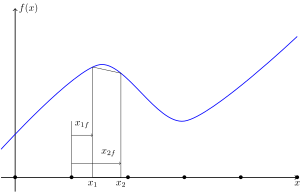

In [2]:
%%itikz --temp-dir
\documentclass[tikz]{standalone}
\usetikzlibrary{intersections}
\begin{document}
\def\xbegin{2.75}
\def\xend{3.75}
\begin{tikzpicture}
  % Axes
  \draw[thick, ->] (-0.5,0) -- (10,0) coordinate[label = {below:$x$}] (xmax);
  \draw[thick, ->] (0,-0.5) -- (0,6) coordinate[label = {right:$f(x)$}] (ymax);
  \foreach \x in {0,2,...,10}
    \node (\x point) at (\x,0) {\textbullet};

  % Curve itself
  \draw[blue, thick, name path=curve] plot[smooth] coordinates {(-0.5,1) (3,4) (6,2) (10,5)};
    
  % Trapezoid stuff
  \coordinate [label=below:$x_1$] (xleft) at (\xbegin,0) {};
  \coordinate [label=below:$x_2$] (xright) at (\xend,0) {};
  \node (topleft high) at (\xbegin,6) {};
  \node (topright high) at (\xend,6) {};
  \path [name path=trapezoid left line] (xleft)--(topleft high);
  \path [name path=trapezoid right line] (xright)--(topright high);
  \path [name intersections={of=trapezoid left line and curve, by=trapezoidleft}];
  \path [name intersections={of=trapezoid right line and curve, by=trapezoidright}];
  \draw (xleft) -- (trapezoidleft) -- (trapezoidright) -- (xright) -- cycle;

  % Fractional component arrows
  \draw (2,0) -- (2,2);
  \draw [->] (2,1.5) -- (\xbegin,1.5) node[midway, label=above:$x_{1f}$] {};
  \draw [->] (2,0.5) -- (\xend,0.5) node[near end, label=above:$x_{2f}$] {};
\end{tikzpicture}
\end{document}

Since $x_{1i}=x_{2i}$, we only have a single trapezoid with width $x_{2f}-x_{1f}$. The heights are the interpolated values at $x_1$ and $x_2$:

$$
f(x_1)=(1-x_{1f})y[x_{1i}]+x_{1f}y[x_{1i}+1]
$$

and likewise

$$
f(x_2)=(1-x_{2f})y[x_{2i}]+x_{2f}y[x_{2i}+1]
$$

The area of the trapezoid is

$$
\frac{1}{2}\left(x_{2f}-x_{1f}\right)\left((1-x_{1f})y[x_1]+ \\
x_{1f}y[x_1+1]+(1-x_{2f})y[x_2]+x_{2f}y[x_2+1]\right)
$$

so the average is

$$
\frac{1}{2\left(x_{2f}-x_{1f}\right)} \left(x_{2f}-x_{1f}\right)\left((1-x_{1f})y[x_1]+x_{1f}y[x_1+1]\\
+(1-x_{2f})y[x_2]+x_{2f}y[x_2+1]\right) \\
=\frac{1}{2}\left((1-x_{1f})y[x_1]+x_{1f}y[x_1+1]+(1-x_{2f})y[x_2]+x_{2f}y[x_2+1]\right)
$$

## Case 2: Endpoints in Adjacent Trapezoids

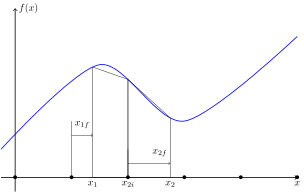

In [3]:
%%itikz --temp-dir
\documentclass[tikz]{standalone}
\usetikzlibrary{intersections}
\begin{document}
\def\xbegin{2.75}
\def\xmid{4}
\def\xend{5.5}
\begin{tikzpicture}
  % Axes
  \draw[thick, ->] (-0.5,0) -- (10,0) coordinate[label = {below:$x$}] (xmax);
  \draw[thick, ->] (0,-0.5) -- (0,6) coordinate[label = {right:$f(x)$}] (ymax);
  \foreach \x in {0,2,...,10}
    \node (\x point) at (\x,0) {\textbullet};

  % Curve itself
  \draw[blue, thick, name path=curve] plot[smooth] coordinates {(-0.5,1) (3,4) (6,2) (10,5)};
    
  % Trapezoid stuff
  \coordinate [label=below:$x_1$] (xleft) at (\xbegin,0) {};
  \coordinate [label=below:$x_{2i}$] (xmid) at (\xmid,0) {};
  \coordinate [label=below:$x_2$] (xright) at (\xend,0) {};
  \node (topleft high) at (\xbegin,6) {};
  \node (topmid high) at (\xmid, 6) {};
  \node (topright high) at (\xend,6) {};
  \path [name path=trapezoid left line] (xleft)--(topleft high);
  \path [name path=trapezoid mid line] (xmid) -- (topmid high);
  \path [name path=trapezoid right line] (xright)--(topright high);
  \path [name intersections={of=trapezoid left line and curve, by=trapezoidleft}];
  \path [name intersections={of=trapezoid mid line and curve, by=trapezoidmid}];
  \path [name intersections={of=trapezoid right line and curve, by=trapezoidright}];
  \draw (xleft) -- (trapezoidleft) -- (trapezoidmid) -- (xmid) -- cycle;
  \draw (xmid) -- (trapezoidmid) -- (trapezoidright) -- (xright) -- cycle;

  % Fractional component arrows
  \draw (2,0) -- (2,2);
  \draw (4,0) -- (4,1);
  \draw [->] (2,1.5) -- (\xbegin,1.5) node[midway, label=above:$x_{1f}$] {};
  \draw [->] (4,0.5) -- (\xend,0.5) node[near end, label=above:$x_{2f}$] {};
\end{tikzpicture}
\end{document}

Since $x_{1i}=x_{2i}$, we have two trapezoids with width $1-x_{1f}+x_{2f}$. The heights are the interpolated values at $x_1$ and $x_2$:

$$
f(x_1)=(1-x_{1f})y[x_{1i}]+x_{1f}y[x_{1i}+1]
$$

and likewise

$$
f(x_2)=(1-x_{2f})y[x_{2i}]+x_{2f}y[x_{2i}+1]
$$

The area of the two trapezoids together is

$$
\frac{1}{2} \left(1-x_{1f}\right) \left((1-x_{1f})y[x_1]+x_{1f}y[x_{2i}]+y[x_{2i}]\right) \\
+ \frac{1}{2} x_{2f} \left((1-x_{2f})y[x_{2i}]+x_{2f}y[x_{2i}+1]+y[x_{2i}]\right)
$$

so the average is

$$
\frac{1}{2\left(1-x_{1f}+x_{2f}\right)}\left( \left(1-x_{1f}\right) \left((1-x_{1f})y[x_1]+x_{1f}y[x_{2i}]+y[x_{2i}]\right) \\
+ x_{2f} \left((1-x_{2f})y[x_{2i}]+x_{2f}y[x_{2i}+1]+y[x_{2i}]\right) \right)
$$

which simplifies to

$$
\frac{1}{2\left(1-x_{1f}+x_{2f}\right)} \left( \left((1-x_{1f})^2y[x_1]+x_{1f}(1-x_{1f})y[x_{2i}]\right) \\
+\left(x_{2f}(1-x_{2f})y[x_{2i}]+x_{2f}^2y[x_{2i}+1]\right)+2 y[x_{2i}]\right)
$$

## Case 3: Separated Endpoints

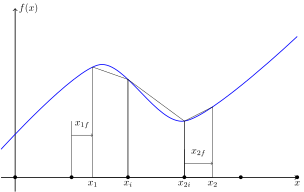

In [4]:
%%itikz --temp-dir
\documentclass[tikz]{standalone}
\usetikzlibrary{intersections}
\begin{document}
\def\xbegin{2.75}
\def\xmidl{4}
\def\xmidr{6}
\def\xend{7}
\begin{tikzpicture}
  % Axes
  \draw[thick, ->] (-0.5,0) -- (10,0) coordinate[label = {below:$x$}] (xmax);
  \draw[thick, ->] (0,-0.5) -- (0,6) coordinate[label = {right:$f(x)$}] (ymax);
  \foreach \x in {0,2,...,10}
    \node (\x point) at (\x,0) {\textbullet};

  % Curve itself
  \draw[blue, thick, name path=curve] plot[smooth] coordinates {(-0.5,1) (3,4) (6,2) (10,5)};
    
  % Trapezoid stuff
  \coordinate [label=below:$x_1$] (xleft) at (\xbegin,0) {};
  \coordinate [label=below:$x_i$] (xmidl) at (\xmidl,0) {};
  \coordinate [label=below:$x_{2i}$] (xmidr) at (\xmidr,0) {};
  \coordinate [label=below:$x_2$] (xright) at (\xend,0) {};
  \node (topleft high) at (\xbegin,6) {};
  \node (topmidl high) at (\xmidl, 6) {};
  \node (topmidr high) at (\xmidr, 6) {};
  \node (topright high) at (\xend,6) {};
  \path [name path=trapezoid left line] (xleft)--(topleft high);
  \path [name path=trapezoid midl line] (xmidl) -- (topmidl high);
  \path [name path=trapezoid midr line] (xmidr) -- (topmidr high);
  \path [name path=trapezoid right line] (xright)--(topright high);
  \path [name intersections={of=trapezoid left line and curve, by=trapezoidleft}];
  \path [name intersections={of=trapezoid midl line and curve, by=trapezoidmidl}];
  \path [name intersections={of=trapezoid midr line and curve, by=trapezoidmidr}];
  \path [name intersections={of=trapezoid right line and curve, by=trapezoidright}];
  \draw (xleft) -- (trapezoidleft) -- (trapezoidmidl) -- (xmidl) -- cycle;
  \draw (xmidl) -- (trapezoidmidl) -- (trapezoidmidr) -- (xmidr) -- cycle;
  \draw (xmidr) -- (trapezoidmidr) -- (trapezoidright) -- (xright) -- cycle;

  % Fractional component arrows
  \draw (2,0) -- (2,2);
  \draw (6,0) -- (6,1);
  \draw [->] (2,1.5) -- (\xbegin,1.5) node[midway, label=above:$x_{1f}$] {};
  \draw [->] (6,0.5) -- (\xend,0.5) node[midway, label=above:$x_{2f}$] {};
\end{tikzpicture}
\end{document}

We can apply normal trapezoidal integration to the center trapezoids, leaving the special handling only for the trapezoids at the beginning and end. We previously derived formulas for the end trapezoids, so adding all the trapezoids together produces

$$
\frac{1}{2} \left(1-x_{1f}\right) \left((1-x_{1f})y[x_1]+x_{1f}y[x_1+1]+y[x_1+1]\right) \\
+ \frac{1}{2} \left(y[x_1+1]+y[x_1+2]\right) + \cdots + \frac{1}{2} \left(y[x_{2i}-1]+y[x_{2i}]\right) \\
\frac{1}{2} x_{2f} \left((1-x_{2f})y[x_{2i}]+x_{2f}y[x_{2i}+1]+y[x_{2i}]\right)
$$

The intermediate terms combine in the usual manner, leaving us with

$$
\frac{1}{2} \left(1-x_{1f}\right) \left((1-x_{1f})y[x_1]+x_{1f}y[x_1+1]\right) \\
+ \sum_{n=x_1+1}^{x_{2i}} y[n] + \frac{1}{2} x_{2f} \left((1-x_{2f})y[x_{2i}]+x_{2f}y[x_{2i}+1]\right)
$$

or

$$
\frac{1}{2} \left((1-x_{1f})^2y[x_1]+x_{1f}(1-x_{1f})y[x_{2i}]\right) \\
+ \sum_{n=x_1+1}^{x_{2i}} y[n] + \frac{1}{2} x_{2f} \left(x_{2f}(1-x_{2f})y[x_{2i}]+x_{2f}^2y[x_{2i}+1]\right)
$$

as the total area under the trapezoids. The average is therefore

$$
\frac{1}{x_2-x_1} \left(
\frac{1}{2} \left((1-x_{1f})^2y[x_1]+x_{1f}(1-x_{1f})y[x_{2i}]\right) \\
+ \sum_{n=x_1+1}^{x_{2i}} y[n] + \frac{1}{2} x_{2f} \left(x_{2f}(1-x_{2f})y[x_{2i}]+x_{2f}^2y[x_{2i}+1]\right) \right)
$$

# Final code

This is the final code that combines the three cases to produce an averaging routine using trapezoidal integration.

*This is not synced to the actual code in the repo, but this should theoretically never need to be updated again.*

In [5]:
"""
Computes the average of the data over the specified interval with integrals.

The bounds on the given interval need not be integers.
Linear interpolation is used for noninteger bounds.

Note: Due to trapezoidal approximation this will not produce the
normal average if the bounds are integers.
Both endpoints are explicitly included, unlike normal array slicing.
In addition, the values at the extremities receive half the weight
as the rest of the data, following the trapezoidal integration formula.
"""
def average_interval_data(data, begin, end):
    if end<begin:
        raise ValueError("End must be larger than begin")
    if begin<0 or end>(len(data)-1):
        raise ValueError("Invalid index range specified")
    width=end-begin
    # Handle special case of width=0
    if width==0:
        index_int=int(np.floor(begin))
        index_frac=begin-np.floor(begin)
        return (1-index_frac)*data[index_int]+index_frac*data[index_int+1]

    # Get bounding indicies
    begin_index=int(np.floor(begin))
    begin_frac=begin-begin_index
    end_index=int(np.ceil(end))-1
    end_frac=1-(np.ceil(end)-end)

    if end_index-begin_index>0:
        if end_index-begin_index==1:
            # Case 2: two trapezoids with no whole trapezoids in between
            # Compute the portion of the trapzeoid normally folded into sum
            # Lump sum does not work because the widths are smaller
            sum_interval=data[end_index]*(1-begin_frac+end_frac)
            sum_interval*=0.5
        else:
            # Case 3: general trapezoidal integration
            # Increment begin_index to exclude start element
            # Increment end_index to include second-to-last element
            # but exclude last
            sum_interval=sum(data[begin_index+1:end_index+1])

        # Compute beginning contribution
        begin_val=(1-begin_frac)**2 * data[begin_index] \
                + begin_frac*(1-begin_frac)*data[begin_index+1]
        begin_val*=0.5
        # Compute ending contribution
        end_val=end_frac*(1-end_frac)*data[end_index] \
                + end_frac**2*data[end_index+1]
        end_val*=0.5

        # Add this to the sum and average by dividing out width
        sum_interval+=(begin_val+end_val)
    else:
        # Case 1: A single trapezoid
        # begin_index and end_index equal here, but separate for readability
        sum_interval=(end_frac-begin_frac)* \
            ((1-begin_frac)*data[begin_index]+begin_frac*data[begin_index+1]+ \
            (1-end_frac)*data[end_index]+end_frac*data[end_index+1])
        sum_interval*=0.5
    return sum_interval/width